# Tarea 3 -  Modelos No-Lineales y Funciones de Costo 

### ITESM - Escuela de Ingeniería y Ciencias
#### Maestría en Ciencias Computacionales
#### Aprendizaje Automático

---

## Carlos E. Hdz Rincón - A01181616

# Carga de datos
Se usarán los datos en `aprauto_assignment3_datatrain.csv` y `aprauto_assignment3_datatest.csv`.

In [ ]:
%matplotlib inline

import numpy as np    # biblioteca para el manejo de vectores y matrices en python.
import pandas as pd   # biblioteca para el manejo de datos y tablas.
import matplotlib.pyplot as plt   # biblioteca para visualización de datos.

import statsmodels.api as sm      # biblioteca para pruebas estadísticas.

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Connect to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data_root_location = "/content/drive/My Drive/AprendizajeAutomatico/Assignment3/"
train_filename = "aprauto_assignment3_datatrain.csv"
test_filename = "aprauto_assignment3_datatest.csv"

file_headers = ["x", "y"]

datatrain = pd.read_csv(f"{data_root_location}{train_filename}",
                        names=file_headers,
                        skiprows=1)
print(datatrain.head())
print(f"Train: {datatrain.shape}")

datatest = pd.read_csv(f"{data_root_location}{test_filename}",
                       names=file_headers,
                       skiprows=1)
print(datatest.head())
print(f"Test: {datatest.shape}")

# Extract the features and labels for better manipulation
X_train, y_train, X_test, y_test = datatrain.x.values.reshape(-1,1),\
 datatrain.y.values.reshape(-1, 1),\
  datatest.x.values.reshape(-1, 1),\
   datatest.y.values.reshape(-1, 1)


          x         y
0  1.414141  0.347638
1  0.040404  0.296082
2  0.343434  1.353506
3  1.717172  1.100935
4  0.101010  0.636017
Train: (80, 2)
          x         y
0  0.363636  1.424585
1  0.525253  1.053235
2  1.575758  0.266515
3  1.838384  2.878358
4  0.989899 -0.184339
Test: (20, 2)


# 1.
Obtener la función $𝑝 = 𝑓(𝑢)$ a partir de la función:

$u=ln(\frac{p}{1-p})$.

---

1. Por regla de logaritmos: $log_a(b) = c \rightarrow b = a^c$
    
    $e^u=\frac{p}{1-p}$

2. Pasamos el divisor:

    $e^u(1-p)=p$

3. Eliminamos paréntesis:

    $e^u-e^up=p$

4. Movemos términos

    $e^u=p+e^up$

5. Factorizamos:

    $e^u = p(1 + e^u)$

6. Resolvemos $p$

    $p=f(u)=\frac{e^u}{1 + e^u}$

# 2.
Los siguientes incisos se basan en los datos de los archivos que se encuentran en
Canvas: `datatrain.csv`, y `datatest.csv`. Los datos fueron generados aleatoriamente a partir
de la función cúbica $y=5x^3-12.5x^2+7.5x$ incluyendo ruido gaussiano con media 0 y
desviación estándar 0.5.

## a.
Obtener la gráfica de dispersión de los datos de entrenamiento _(train)_, x vs y.

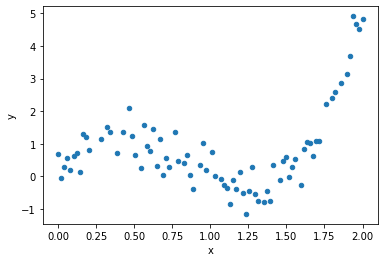

In [ ]:
datatrain.plot.scatter("x","y")

## b.
Obtener la gráfica de dispersión de los datos de prueba _(test)_, x vs y.

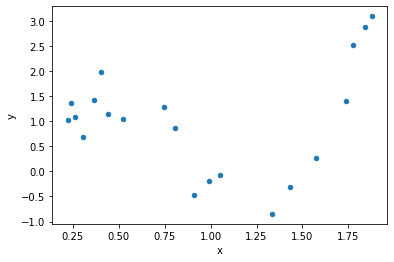

In [ ]:
datatest.plot.scatter("x","y")

## c.
Incluir además la gráfica de la función cúbica $𝑦 = 5𝑥^3 − 12.5𝑥^2 + 7.5𝑥$ en las dos gráficas anteriores.

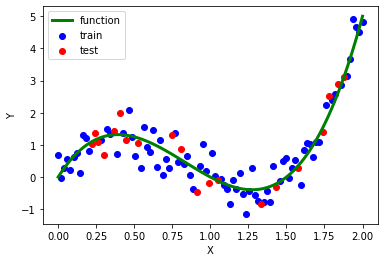

In [ ]:
plt.scatter(datatrain.x, datatrain.y, color="b", label="train")
plt.scatter(datatest.x, datatest.y, color="r", label="test")

# Function
function_x = np.linspace(0, 2, 100)
function_y = 5*function_x**3 - 12.5*function_x**2 + 7.5*function_x

plt.plot(function_x, function_y, color="g", label="function", linewidth=3)

plt.legend(loc="upper left")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

## d.
Contestar los siguientes incisos:

### i.
Usando los datos de entrenamiento (train), obtener el modelo de regresión lineal $\hat{y}=\beta_0+\beta_1x$. Interpreta el valor de significancia de cada uno de los coeficientes del modelo obtenidos.

---

Se obtiene un modelo donde $\beta_0=0.0845$ y $\beta_1=0.7212$ que corresponden a la intersección y a la pendiente respectivamente de la línea que representa al modelo. Sin embargo, con los valores P alejados de 0 para $P_{\beta_0}=0.758$ se puede apreciar que el modelo no está haciendo buen fit a los valores de entrenamiento.

Lo anterior hace sentido sabiendo que la función original que generó los datos es una función de grado 3, se espera que el mejor modelo sea también una función de grado 3.

In [ ]:
def train_regression_model(X: np.ndarray, y: np.ndarray):
    xones = sm.add_constant(X)  # Agregamos una columna de 1s

    model = sm.OLS(y, xones).fit()
    print(model.summary())

    return model

model_d_i = train_regression_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     9.538
Date:                Thu, 10 Sep 2020   Prob (F-statistic):            0.00279
Time:                        01:44:55   Log-Likelihood:                -128.16
No. Observations:                  80   AIC:                             260.3
Df Residuals:                      78   BIC:                             265.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0845      0.273      0.309      0.7

### ii.
Incluir la gráfica de dispersión de los datos de entrenamiento, junto con la
gráfica de la recta de regresión $\hat{y}$ obtenida.

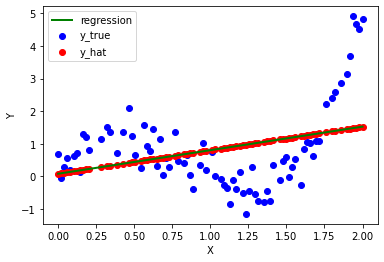

In [ ]:
def plot_train_regression_line(model, X: np.ndarray, y: np.ndarray):
    y_hat = model.predict(sm.add_constant(X))

    # Calculate a continous line that will illustrate the regression line
    regression_x = np.linspace(0, 2, 100).reshape(100,1)
    # To be able to support non-linear variables, we must elevate regression_x
    for pow in range(2, len(model.params)):
        regression_x = np.concatenate([regression_x,
                                        np.power(regression_x[:,0], pow).reshape(100,1)],
                                       axis=1)
    regression_y = model.predict(sm.add_constant(regression_x))


    # We are only concerned with the linear var for the scatter plot, the one
    #  in the first column

    # True Values
    plt.scatter(X[:,0], y, color="b", label="y_true")

    # Predicted values
    plt.scatter(X[:,0], y_hat, color="r", label="y_hat", zorder=1)

    # Continuous regression line
    plt.plot(regression_x[:,0], regression_y, "-", color="g",
             label="regression", zorder=2, linewidth=2)

    plt.legend(loc="best")
    plt.xlabel("X")
    plt.ylabel("Y")

    plt.show()

plot_train_regression_line(model_d_i, X_train, y_train)

### iii.
Usando los datos de prueba (test), obtener el valor del error cuadrático medio MSE y el coeficiente de determinación ajustado $\bar{R^2}$.

In [ ]:
def mse(y_real, y_predicted):
    # Let's make sure that y_predicted is in the same shape as y_real
    y_predicted = y_predicted.reshape(y_real.shape)

    return np.mean(np.square(y_real - y_predicted))

def sse(y_real: np.ndarray, y_predicted: np.ndarray):
    y_predicted = y_predicted.reshape(y_real.shape)
    return np.sum(np.square(y_real - y_predicted))

def adj_r_squared(y_real, y_predicted, X):

    # Let's make sure that y_predicted is in the same shape as y_real
    y_predicted = y_predicted.reshape(y_real.shape)

    # Squared sum of errors
    model_sse = sse(y_real, y_predicted)

    y_mean = np.mean(y_real)

    # Squared sum of regression + sse = syy
    syy = np.sum(np.square(y_real - y_mean))

    r_squared = 1 - (model_sse/syy)

    # Number of samples, independent variables (Columns in X)
    n, k =  X.shape
    adj_r_squared = 1 - (((n-1)/(n-k-1)) * (1-r_squared))

    return adj_r_squared

In [ ]:
def calculate_mse_adj_r_squared(X, y, model):
    xones = sm.add_constant(X)   # Add a column of 1s
    y_predicted = model.predict(xones)

    model_mse = mse(y, y_predicted)
    model_adj_r_squared = adj_r_squared(y, y_predicted, X)

    print(f"MSE: {model_mse}")
    print(f"Adj. R-squared: {model_adj_r_squared}")

print("Para dataset de prueba:")
calculate_mse_adj_r_squared(X_test, y_test, model_d_i)

Para dataset de prueba:
MSE: 1.1947220036841906
Adj. R-squared: -0.12732449222983555


### iv.
Repite los incisos i, ii, iii para obtener el modelo de regresión cuadrático $\hat{y}=\beta_0+\beta_1x+\beta_2x^2$.

In [ ]:
def add_features_as_columns(*columns: np.ndarray) -> np.ndarray:
    
    matrix = np.concatenate(columns, axis=1)

    return matrix

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     41.36
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           6.32e-13
Time:                        02:05:03   Log-Likelihood:                -103.59
No. Observations:                  80   AIC:                             213.2
Df Residuals:                      77   BIC:                             220.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7413      0.288      6.047      0.0

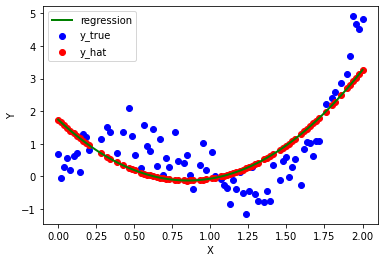

Para dataset de prueba:
MSE: 0.656888590063617
Adj. R-squared: 0.34370758901104403


In [ ]:
# Get the squared features as a new features for Train and Test
# Create a new matrix with features as x + x^2, the bias unit will be added
#  during training
squared_X_train = add_features_as_columns(X_train,
                                          np.square(X_train))

squared_X_test = add_features_as_columns(X_test,
                                         np.square(X_test))

# Calculate models
model_d_iv = train_regression_model(squared_X_train, y_train)
plot_train_regression_line(model_d_iv, squared_X_train, y_train)
print("Para dataset de prueba:")
calculate_mse_adj_r_squared(squared_X_test, y_test, model_d_iv)

### v.
Repite los incisos i, ii, iii para obtener el modelo de regresión cúbico $\hat{y}=\beta_0+\beta_1x+\beta_2x^2+\beta_3x^3$.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     216.0
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           4.23e-37
Time:                        02:08:00   Log-Likelihood:                -42.614
No. Observations:                  80   AIC:                             93.23
Df Residuals:                      76   BIC:                             102.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0712      0.169      0.422      0.6

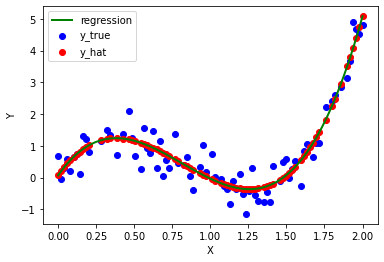

Para dataset de prueba:
MSE: 0.1351781554881551
Adj. R-squared: 0.8565035626240973


In [ ]:
# Get the cube features as a new features for Train and Test
# Create a new feature matrix x + x^2 + x^3
cube_X_train = add_features_as_columns(X_train,
                                       np.square(X_train),
                                       np.power(X_train, 3))

cube_X_test = add_features_as_columns(X_test,
                                      np.square(X_test),
                                      np.power(X_test, 3))

# Calculate models
model_d_v = train_regression_model(cube_X_train, y_train)
plot_train_regression_line(model_d_v, cube_X_train, y_train)
print("Para dataset de prueba:")
calculate_mse_adj_r_squared(cube_X_test, y_test, model_d_v)

### vi.
Repite los incisos i, ii, iii para el modelo de regresión de grado cuatro $\hat{y}=\beta_0+\beta_1x+\beta_2x^2+\beta_3x^3+\beta_4x^4$.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     160.5
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           5.88e-36
Time:                        02:08:36   Log-Likelihood:                -42.461
No. Observations:                  80   AIC:                             94.92
Df Residuals:                      75   BIC:                             106.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1316      0.204      0.646      0.5

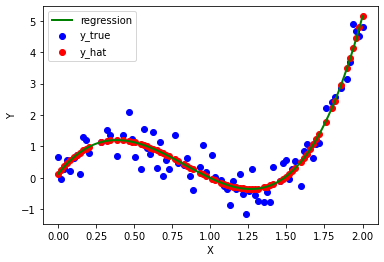

Para dataset de prueba:
MSE: 0.13847782211011983
Adj. R-squared: 0.8432009053011633


In [ ]:
# Get the fourth power features as a new features for Train and Test
# Create a new feature matrix x + x^2 + x^3 + x^4
fourth_X_train = add_features_as_columns(X_train,
                                        np.square(X_train),
                                        np.power(X_train, 3),
                                        np.power(X_train, 4))

fourth_X_test = add_features_as_columns(X_test,
                                        np.square(X_test),
                                        np.power(X_test, 3),
                                        np.power(X_test, 4))

# Calculate models
model_d_vi = train_regression_model(fourth_X_train, y_train)
plot_train_regression_line(model_d_vi, fourth_X_train, y_train)
print("Para dataset de prueba:")
calculate_mse_adj_r_squared(fourth_X_test, y_test, model_d_vi)

### vii.
Incluye tus conclusiones finales a partir de los resultados de los modelos
anteriores.

---

#### Modelo lineal

Para dataset de prueba:
* MSE: 1.1947220036841906
* Adj. R-squared: -0.12732449222983555

El error es bastante y con un valor negativo $\bar{R^2}$ se ve que este modelo es muy malo, no es suficiente para modelar los sets de entrenamiento ni prueba.

#### Modelo cuadrático

$\hat{y}=\beta_0+\beta_1x+\beta_2x^2$

Variable|Coef.|P
---|---|---
const      |    1.7413   |   0.000
x1         |   -4.3764   |   0.000
x2         |    2.5689   |   0.000

Para dataset de prueba:
* MSE: 0.656888590063617
* Adj. R-squared: 0.34370758901104403

El error se redujo considerablemente en comparación con el modelo lineal, sin embargo, el valor de $\bar{R^2}$ indica que no es un buen modelo para explicar _y_. Los valores P indican que es lo mejor que el modelo pudo hacer con las variables dependientes.

#### Modelo cúbico

$\hat{y}=\beta_0+\beta_1x+\beta_2x^2+\beta_3x^3$

Variable|Coef.|P
---|---|---
const    |      0.0712   |   0.674
x1       |      6.8444   |   0.000
x2       |    -11.7303   |   0.000
x3       |      4.7801   |   0.000

Para dataset de prueba:
* MSE: 0.1351781554881551
* Adj. R-squared: 0.8565035626240973

El error se redujo aún más y el valor de $\bar{R^2}$ subió mucho también, lo que indica que es un modelo muy bueno. Esto hace sentido ya que la ecuación que generó el dataset era de tercer grado.

Adicionalmente, los coeficientes se acercan mucho a los coeficientes de la ecuación original. No son iguales, pero esto se puede deber a dos cosas:
1. Al hecho de que introducimos una constante $\beta_0$ que por su valor P indica que puede estar metiendo ruido y no es relevante para el modelo.
1. Al limitado número de ejemplos de entrenamiento, si metiéramos más ejemplos probablemente los coeficientes se acerquen más a los originales.

#### Modelo grado cuatro

$\hat{y}=\beta_0+\beta_1x+\beta_2x^2+\beta_3x^3+\beta_4x^4$

Variable|Coef.|P
---|---|---
const     |     0.1316   |   0.520
x1        |     6.1250   |   0.000
x2        |   -10.0704   |   0.002
x3        |     3.4864   |   0.155
x4        |     0.3218   |   0.593

Para dataset de prueba:
* MSE: 0.13847782211011983
* Adj. R-squared: 0.8432009053011633

El valor del MSE en datos de prueba subió ligeramente con respecto al modelo cúbico, el valor $\bar{R^2}$ se redujo un poco. Esto puede sugerir que el modelo de grado cuatro  es similar al cúbico, pero es peor. Si a esto sumamos que el valor P de las variables se alejan del 0, este modelo no es muy bueno para modelar nuestro dataset.

#### Conclusiones

Se demostró empíricamente que usando regresión lineal de mayores grados se consiguió un mejor modelo para el dataset de entrenamiento.

Además, se comprueba que la regresión lineal de mayores grados tenderá a encontrar la función que originó los datos de entrenamiento, es decir, aquella que mejor explique el comportamiento de su línea de regresión.

# 3.
Los siguientes incisos se resolverán incluyendo un valor extremo _(outlier)_ tanto en el conjunto de entrenamiento, como en el conjunto de prueba. Para ello, deberás cambiar únicamente el valor de 𝑦 del primer dato de los conjuntos de entrenamiento y prueba como sigue: En el conjunto de entrenamiento _(datatrain)_ el primer punto es (1.41414141, 0.3476383) y deberás cambiarlo a (1.41414141, 4). En el conjunto de prueba _(test)_ el primer punto es (0.36363636, 1.42458487) y deberás cambiarlo a (0.36363636, 5). Usando estos nuevos conjuntos de entrenamiento y prueba contesta los siguientes incisos:

In [ ]:
y_train_outlier = y_train.copy()
y_test_outlier = y_test.copy()

y_train_outlier[0] = 4
y_test_outlier[0] = 5

## i.
Obtener el modelo de regresión cúbico con los datos de entrenamiento y los niveles de significancia de sus coeficientes. Obtener el coeficiente de determinación con los datos de prueba y la gráfica de dispersión de los datos de prueba junto con la gráfica de la función cúbica de regresión obtenida. Compara tus resultados con el modelo de los datos sin los outliers.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     90.84
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           4.59e-25
Time:                        02:15:48   Log-Likelihood:                -74.757
No. Observations:                  80   AIC:                             157.5
Df Residuals:                      76   BIC:                             167.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1247      0.252      0.494      0.6

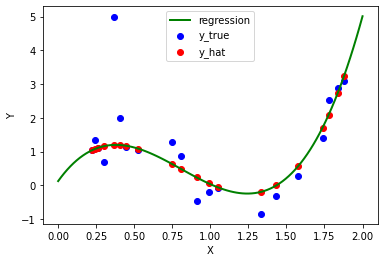

Para dataset de prueba:
MSE: 0.874461368876117
Adj. R-squared: 0.44585141170518994


In [ ]:
# Get the cube features as a new features for Train and Test
# Create a new feature matrix x + x^2 + x^3
cube_X_train_outliers = add_features_as_columns(X_train,
                                                np.square(X_train),
                                                np.power(X_train, 3))
cube_X_test_outliers = add_features_as_columns(X_test,
                                                np.square(X_test),
                                                np.power(X_test, 3))

# Calculate models
model_e_i = train_regression_model(cube_X_train_outliers,
                                   y_train_outlier)

plot_train_regression_line(model_e_i,
                           cube_X_test_outliers,
                           y_test_outlier)

print("Para dataset de prueba:")
calculate_mse_adj_r_squared(cube_X_test_outliers,
                            y_test_outlier,
                            model_e_i)

---
La presencia de outliers afecta significativamente la evaluación de los modelos:

Métrica|Con Outliers|Sin outliers
---|---:|---:
MSE|0.874461368876117|0.1351781554881551
$\bar{R^2}$|0.44585141170518994|0.8565035626240973

Se aprecia un aumento considerable en el MSE de más de 70%, es decir, el modelo se está interpretando como más errado aún cuando sólo hay un outlier.

Los coeficientes sufren una pequeña variación y en $\bar{R^2}$ se aprecia una caída de casi la mitad de qué tanto las variables independientes explican el modelo. Los valores P de las variables indican que es lo mejor que el modelo puede hacer con los datos de entrenamiento. Esto indica que el outlier está introduciendo mucho error a pesar de ser uno solo.



## ii.
Con los datos de prueba calcular el valor del error cuadrático medio MSE y la suma de los cuadrados de los errores SSE.

In [ ]:
# Get y_hat for the test data
# Add a column of 1s
y_predicted_outliers = model_e_i.predict(sm.add_constant(cube_X_test_outliers))
y_predicted_outliers = y_predicted_outliers.reshape(y_test_outlier.shape)

In [ ]:
print(f"MSE para test con outliers: {mse(y_real=y_test_outlier, y_predicted=y_predicted_outliers)}")
print(f"SSE para test con outliers: {sse(y_test_outlier, y_predicted_outliers)}")

MSE para test con outliers: 0.874461368876117
SSE para test con outliers: 17.48922737752234


## iii.
Con los datos de prueba calcular el valor del error absoluto medio MAE y la suma de los valores absolutos de los errores.

In [ ]:
def mae(y_real: np.ndarray, y_predicted: np.ndarray):
    return np.mean(np.absolute(y_real - y_predicted))

def sae(y_real: np.ndarray, y_predicted: np.ndarray):
    return np.sum(np.absolute(y_real - y_predicted))

print(f"MAE para test con outliers: {mae(y_real=y_test_outlier,\
                                         y_predicted=y_predicted_outliers)}")

print(f"Suma de errores absolutos: {sae(y_real=y_test_outlier,\
                                         y_predicted=y_predicted_outliers)}")

MAE para test con outliers: 0.48659810299740147
Suma de errores absolutos: 9.73196205994803


## iv.
Con los datos de prueba calcular el valor del error con la función de costo Huber para $\delta=1$.

In [ ]:
def huber(y_real: np.ndarray, y_predicted: np.ndarray, delta: int):
    
    simple_error = np.absolute(y_real - y_predicted)
    n = simple_error.shape[0]

    res = np.piecewise(simple_error,
                          [simple_error <= delta,
                           simple_error > delta],
                          [lambda x: (x**2)/(n),
                           lambda x: (delta * (x - ((delta**2)/2))/n)])

    # Each value has already been divided by n, so to get the mean, we just sum
    res = np.sum(res)
    return res

print(f"Huber para test con outliers y delta=1: {huber(y_test_outlier,\
                                                       y_predicted_outliers,\
                                                       1)}")

Huber para test con outliers y delta=1: 0.3161562428364567


## v.
Con los datos de prueba calcular el valor del error con la función de costo Log-Cosh, así como la de su valor promedio.

In [ ]:
def logcosh(y_real: np.ndarray, y_predicted: np.ndarray) -> tuple:
    res = np.log(np.cosh(y_predicted - y_real))
    return np.sum(res), np.mean(res)

print(f"Log-cosh para test con outliers (sum/mean): {logcosh(y_test_outlier,\
                                                    y_predicted_outliers)}")

Log-cosh para test con outliers (sum/mean): (4.534749167081794, 0.2267374583540897)


## vi.
Con los datos de prueba calcular el valor del error del logaritmo cuadrático medio, MSLE. **NOTA: indica la constante que en dado caso le sumes a la fórmula para obtener el valor buscado.**

In [ ]:
def msle(y_real: np.ndarray, y_predicted: np.ndarray, constant: int= 1):
    res = np.square(np.log(y_real + constant) - np.log(y_predicted + constant))
    return np.mean(res)

print(f"MSLE con constante=1: {msle(y_test_outlier, y_predicted_outliers, 1)}")

MSLE con constante=1: 0.2578678328476926


## vii.
Con los datos de prueba calcular el valor del error del porcentaje absoluto medio, MAPE. **NOTA: indica la constante que en dado caso le sumes a la fórmula para obtener el valor buscado.**

In [ ]:
def mape(y_real: np.ndarray, y_predicted: np.ndarray, constant: int= 1):
    y_real = y_real + constant
    y_predicted = y_predicted + constant

    res = np.absolute((y_real - y_predicted)/y_real)

    return np.mean(res) * 100

print(f"MAPE con constante=1: {mape(y_test_outlier, y_predicted_outliers, 1)}")

MAPE con constante=1: 44.08729180948604


#4.
Incluye tus conclusiones finales de esta actividad.

---
En este inciso se demuestra que MSE es un error que es muy sensible a la presencia de outliers, la presencia de uno solo disparó el MSE en un 70%.

Un valor menor para MAE para los mismas predicciones en el dataset de prueba nos demuestra que MAE tolera un poco mejor la presencia de outliers, hay que considerar que si se esperan outliers dentro del dataset de entrenamiento, MSE nos dará una mejor idea del comportamiento del modelo. Escalar los valores al mismo rango también es recomendable para reducir el ruido.

Huber también muestra un valor menor de error, demostrando que es la combinación de lo mejor de MAE y de MSE y por tanto es más tolerante a la presencia de los outliers. Un valor de $\delta=1$ es suficiente para un buen comportamiento.

Logcosh presenta un comportamiento ligeramente mejor que Huber al usar su promedio. MSLE y MAPE usando una constante de 1 es suficiente para evitar operaciones inválidas como divisiones entre 0. MSLE fue más tolerante a outliers mientras que MAPE tuvo un rendimiento equiparable a MAE.

En conclusión, cuando se trate de evaluar qué métrica usar para evaluar un modelo, es conveniente usar tener un conocimiento de si existen outliers en el dataset. En caso de no poder saberlo, es recomendable usar Huber y/o Logcosh; dicho esto, es buena idea usar más de una métrica a la vez para poder tener una mejor certeza de la evaluación del modelo.
